# Manipulating Data with Numpy and Scipy
## Topics

- Array data types with numpy
- Basic statistical analysis with numpy tools
- Introduction to the scipy packages

## Introduction

Today we're covering libraries that are an important part of the core Python data stack - numpy and scipy

**Numpy** is a library for fast numerical processing on 1-dimensional (arrays) or 2-dimensional (tables/matrics) data types.

**Scipy** contains more advanced tools for statistics and regression.


## NumPy Basics
Numerical Python is a powerful library of functions, methods, and data types we can used to analyze our data. Unforunately, it also uses a different set of rules. Let's start off creating some empty arrays, which look like lists, but are in fact vectors.

NumPy arrays differ in a few fundamental ways from Python lists:

1. **Arrays cannot be of mixed types.** They can be all integers, floats, strings, logical (or boolean) values, or other immutable values. They also cannot contain mutable types such as lists. 

2. Arrays can be multidimensional, but they must be rectangular. You can have a list of lists, where the first interior list is 3 elements long, the second 5, and the third 12, but for your multidemsional arrays, every row must have the same number of columns.

3. We can perform vector operations on them, which can be algebraic functions (like a dot product), or simple replacements of values in a slice of the array.

### Reviewing basic python lists

We have looked at lists before, but we haven't explicitly discussed multi-dimensional arrays. This actually has been implied - we can place anything in a lis, so why not another list? Thusly:

In [3]:
flat_list = [1,2,3]
list_of_lists = [[1,2,3],[4,5,6],[7,8,9]]
print list_of_lists[1][2]

6


Noe that what python calls lists, most other languages - and NumPy - call arrays. They're pretty similar, with the exceptions called out above.

## Arrays
Here's one way: start with a list and turn it into an array with the array method:

In [1]:
import numpy as np

a = [0] * 40 #Remember this trick? This creates a list with 40 elements, each "0"
print type(a)
a = np.array(a)
print type(a)
print a

<type 'list'>
<type 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


You now have an array a of 1 row and 40 columns with zeros. But there's a better way to get a vector of zeros:

In [ ]:
a = np.zeros(40)

And here's how to declare something that's not all zeros

In [2]:
a = np.arange(40)
print a
type(a[0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


numpy.int64

Notice the int type.

What if we want a float? There's a couple ways to do it:

In [3]:
a = np.arange(40, dtype=float)  # Explicitly tell it to use floats
print type(a[0])

a = np.arange(40.0)  # If you give it a float for the length, it will automatically use floats
print type(a[0])

<type 'numpy.float64'>
<type 'numpy.float64'>


Like with range(), you can also give arange() more parameters:

In [4]:
np.arange(40, 50)  # Start and Stop

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [5]:
np.arange(40, 50, 2) # Start, Stop, and increment


array([40, 42, 44, 46, 48])

In [6]:
np.arange(40,50,.25)

array([ 40.  ,  40.25,  40.5 ,  40.75,  41.  ,  41.25,  41.5 ,  41.75,
        42.  ,  42.25,  42.5 ,  42.75,  43.  ,  43.25,  43.5 ,  43.75,
        44.  ,  44.25,  44.5 ,  44.75,  45.  ,  45.25,  45.5 ,  45.75,
        46.  ,  46.25,  46.5 ,  46.75,  47.  ,  47.25,  47.5 ,  47.75,
        48.  ,  48.25,  48.5 ,  48.75,  49.  ,  49.25,  49.5 ,  49.75])

As I said above, you can have arrays with more than one dimension

In [7]:
a = np.zeros(  (10, 10)   ) # Note the inner set of parentheses. (Rows, Columns)
a

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

And you can even modify a particular element with the same syntax, or a subtly different syntax, as our list-of-lists:

In [12]:
a[5,5] = 3  # choose row, then column
a[6,6] = 42  # Only one set of []
a

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  42.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])


You can even add a number to a specific position using the '+=' notation.

In [9]:
a[6,6]+=10 # Add 10 to the nth row, nth column
a

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  52.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

So far, the coolest thing I've shown you isn't really that exciting: a range function that can have floats. The real power of arrays is the ability to have one statement affect a large chunk of an array:

In [13]:
a[1,:] = 1
a

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  42.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [14]:
a[:,0] = 7
a

array([[  7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  7.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  7.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.],
       [  7.,   0.,   0.,   0.,   0.,   0.,  42.,   0.,   0.,   0.],
       [  7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [15]:
a[a == 0] = -1
a

array([[  7.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [  7.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  7.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [  7.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [  7.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [  7.,  -1.,  -1.,  -1.,  -1.,   3.,  -1.,  -1.,  -1.,  -1.],
       [  7.,  -1.,  -1.,  -1.,  -1.,  -1.,  42.,  -1.,  -1.,  -1.],
       [  7.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [  7.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [  7.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

Let us pause for a moment and think about how we would do this with a for loop in lists:

In [ ]:
# Create a list of lists of all zeros
LoL = [[0]*10 for i in range(10)] #LoL - List of Lists
 
# Set entries in row 1 to 1
for i, elem in enumerate(LoL[1]):
    LoL[1][i] = 1

# Set entries in column zero to 7
for L in LoL:
    L[0] = 7

We can also take slices of arrays, just as if they were lists:

In [16]:
a = np.arange(10)
a[2:5]

array([2, 3, 4])

In [17]:
a[-1]

9

In [18]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Maybe you can see the advantage of the array syntax. But wait, there's more! Act now, and we'll throw in math operations for free!

## Vector Math with Arrays
We can do math on many values at once with arrays, no for loop required.

In [19]:
a = np.arange(0, 100, 2)
b = np.arange(50)

a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [20]:
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [21]:
b / 2.0

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5])

In [22]:
a * b # Pairwise multiplication

array([   0,    2,    8,   18,   32,   50,   72,   98,  128,  162,  200,
        242,  288,  338,  392,  450,  512,  578,  648,  722,  800,  882,
        968, 1058, 1152, 1250, 1352, 1458, 1568, 1682, 1800, 1922, 2048,
       2178, 2312, 2450, 2592, 2738, 2888, 3042, 3200, 3362, 3528, 3698,
       3872, 4050, 4232, 4418, 4608, 4802])

In [26]:
(a * b).sum()

80850

In [27]:
np.dot(a, b) # or can take the dot product

80850

## Basic Statistics with Numpy

NumPy is **huge**, with around 1200 pages of [reference documentation](http://docs.scipy.org/doc/numpy/reference/index.html), but all of you will, at some point, use some basic statistics to get a feel for your data. So let's make sure we hit some of those functions:

### Random distributions

In [28]:
a = np.random.uniform(0, 100, 10) # Low, High, Size of output
a

array([ 80.36688279,  76.41797941,  44.01585452,  64.50250085,
         7.58819767,  43.67894627,  42.91488035,   1.55866352,
         7.45429728,  96.04192728])

In [29]:
a = np.random.uniform(0, 100, (3,3)) # Can also give a shape for the third argument
a

array([[ 36.97633676,  71.34839968,  91.28748819],
       [ 74.18891082,  70.0081467 ,  82.45181141],
       [ 67.62637539,  61.28261491,  38.45541902]])

In [30]:
a = np.random.normal(0, 1, 10) # Normal distribution with mean=0, std=1, 10 samples
a

array([-0.60329543,  0.13584718,  0.70284179, -0.05241544,  1.94625975,
       -1.16283852,  1.38540174, -0.11747696,  0.55827299,  0.55768998])

### Summary Statistics

In [44]:
a = np.random.normal(5, 3, 1000)  # Draw 1000 numbers from the standard normal distribution with mean 5 and std 3
np.mean(a) # Calculate the mean of this sample

5.0277401671991839

In [45]:
np.std(a) # Standard deviation

3.0055975856853401

In [46]:
np.min(a)

-4.649922139971908

In [49]:
np.max(a)

15.005527426033218

### Operating on 2d arrays
One of the areas where numpy really shines is its ability to quickly operate along an axis of a 2d array

In [50]:
a = np.ones((5,3))# 5 rows, 3 columns
a

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [51]:
a.sum()  # Sum over all elements

15.0

In [52]:
a.sum(axis=0)  # Sum across all rows

array([ 5.,  5.,  5.])

Rows are axis 0 and Columns are axis 1.  The order here makes sense because its the same order that you use when indexing an array, rows first - then columns.

In [53]:
a.sum(axis=1) # Sum across all columns

array([ 3.,  3.,  3.,  3.,  3.])

## Boolean Numpy Arrays for Selection and Filtering

In [54]:
a = np.zeros(10, dtype=bool)
a

array([False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [55]:
# Slicing and mass-assignment still work
a[2:5] = True
a

array([False, False,  True,  True,  True, False, False, False, False, False], dtype=bool)

In [56]:
# The ~ character inverts the boolean array
b = ~a
b

array([ True,  True, False, False, False,  True,  True,  True,  True,  True], dtype=bool)

In [57]:
# Demonstrating "&" and "|"
a = np.array([True, False, True])
b = np.array([False, False, True])

print "A and B"
print a & b

print "A or B"
print a | b

A and B
[False False  True]
A or B
[ True False  True]


Using boolean expressions, you can specifically read out or assign to pieces of the array based on the values in the array

In [58]:
data = np.random.randn(10)
print data

[-0.9093292  -0.38349568  1.59518938 -0.87131425  0.93717458  0.82669768
 -2.04390626 -1.12253879 -0.79154437  0.44235358]


In [59]:
data_less_than_zero = data < 0
print data_less_than_zero

[ True  True False  True False False  True  True  True False]


In [60]:
data[data_less_than_zero] = 0   # Replace all values less than zero, with zero
print data

[ 0.          0.          1.59518938  0.          0.93717458  0.82669768
  0.          0.          0.          0.44235358]


In [62]:
data = np.random.randn(10)
data[data < 0] = 0  # You could also do this without a temporary variable (data_less_than_zero)
print data

[ 0.          1.07550616  0.34544577  0.          0.          0.          0.
  0.          0.15442195  0.        ]


In [63]:
data = np.random.rand(20,5)*10 # Random data from 0 to 10
print data

[[  6.23717641e+00   8.80782937e+00   5.40597691e+00   9.03869185e+00
    8.29905142e+00]
 [  7.29382233e+00   8.41829140e+00   2.22242822e+00   2.86624536e+00
    7.52556347e+00]
 [  9.72531908e+00   9.04788218e+00   4.61996442e-01   3.41040697e+00
    9.14872526e+00]
 [  5.43894345e+00   1.74339648e+00   6.87611094e+00   3.22668737e+00
    5.65490951e+00]
 [  3.55830717e+00   2.11664450e-01   2.11080705e+00   4.14700914e+00
    4.16095568e+00]
 [  7.81660076e-03   1.33226926e+00   3.57243621e+00   8.30873762e+00
    5.93400567e+00]
 [  4.57288564e+00   3.18551642e+00   8.69727819e+00   9.13311128e+00
    6.33788661e+00]
 [  7.40308453e+00   7.06811798e+00   1.37375831e+00   1.93750256e+00
    3.07290483e+00]
 [  4.39326261e-01   1.98668809e+00   9.44701870e+00   6.21914146e+00
    4.34115565e+00]
 [  4.16006962e+00   6.57722628e+00   9.26633831e+00   3.80616456e+00
    1.88230195e+00]
 [  6.16942233e-01   6.28879907e+00   6.94299950e+00   5.22103135e+00
    2.27494724e+00]
 [  7.4555

In [64]:
# Show me the mean of each row
row_means = data.mean(axis=1)
print row_means

[ 7.55774519  5.66527016  6.35886599  4.58800955  2.8377487   3.83105307
  6.38533563  4.17107364  4.48666603  5.13842014  4.26894388  5.4851906
  4.35614542  4.45058342  5.0982536   4.15160745  6.59438969  3.03964791
  6.66857167  5.23179698]


In [65]:
# Give me a subset of the data matrix, containing only rows with a mean > 5 and the second column < 4 
mean_greater_five = data.mean(axis=1) > 5
print "mean_greater_five: ", mean_greater_five
print

mean_greater_five:  [ True  True  True False False False  True False False  True False  True
 False False  True False  True False  True  True]



In [66]:
new_matrix = data[mean_greater_five, :]
print
print "new_matrix"
print new_matrix


new_matrix
[[ 6.23717641  8.80782937  5.40597691  9.03869185  8.29905142]
 [ 7.29382233  8.4182914   2.22242822  2.86624536  7.52556347]
 [ 9.72531908  9.04788218  0.46199644  3.41040697  9.14872526]
 [ 4.57288564  3.18551642  8.69727819  9.13311128  6.33788661]
 [ 4.16006962  6.57722628  9.26633831  3.80616456  1.88230195]
 [ 7.45552808  1.79312531  8.39346627  1.08771965  8.6961137 ]
 [ 9.66359939  1.47976975  9.63358565  4.56109516  0.15321804]
 [ 9.12234006  6.91054323  8.12709415  2.52790682  6.2840642 ]
 [ 7.71161835  7.90844759  8.93022523  2.86277098  5.92979623]
 [ 7.09781017  5.65132068  1.4801939   8.89568547  3.03397468]]


In [67]:
# OR, all in one line - without a temporary variable
new_matrix = data[ (data.mean(axis=1) > 5) ]
print
print "new_matrix"
print new_matrix


new_matrix
[[ 6.23717641  8.80782937  5.40597691  9.03869185  8.29905142]
 [ 7.29382233  8.4182914   2.22242822  2.86624536  7.52556347]
 [ 9.72531908  9.04788218  0.46199644  3.41040697  9.14872526]
 [ 4.57288564  3.18551642  8.69727819  9.13311128  6.33788661]
 [ 4.16006962  6.57722628  9.26633831  3.80616456  1.88230195]
 [ 7.45552808  1.79312531  8.39346627  1.08771965  8.6961137 ]
 [ 9.66359939  1.47976975  9.63358565  4.56109516  0.15321804]
 [ 9.12234006  6.91054323  8.12709415  2.52790682  6.2840642 ]
 [ 7.71161835  7.90844759  8.93022523  2.86277098  5.92979623]
 [ 7.09781017  5.65132068  1.4801939   8.89568547  3.03397468]]


## SciPy and Fitting

SciPy (pronounced "Sigh Pie") is a collection of libraries that builds on NumPy, and has lots of convenient, fast functions for working with large amounts of scientific data. It's slightly smaller than NumPy, with only 900-odd pages of documentation. That includes sections on integrating C or Fortran code into Python, which is way outside the scope of this course, but if you ever do get to the point where you need a super-efficient implementation of something, you're covered. Especially in the one-off nature of academic science, you're often better served spending less time writing code that takes longer to run, compared to spending lots and lots of time writing code that runs slightly faster.

The [stats](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) module of SciPy has functions for even more statistical distributions, statistical tests, and other assorted functions that a good statistician might need. As an example, let's see how we might use the [linregress](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) function, which does a linear regression on some data. Linear regression is the process of finding a line that minimizes the sum of the square of the vertical distances from each point to the line.

First, we'll set up some noisy data:

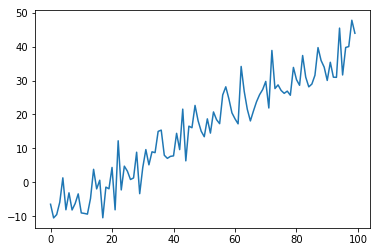

In [72]:
import numpy as np

slope = 0.5
intercept = -10

x = np.arange(0, 100)
y = slope*x + intercept
noise = 5 * np.random.normal(0, 1, size=len(x))

y = y + noise

# Plot the line - more detials on this are covered in a later lecture
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(y);

However, using a bit of linear algebra, we can actually compute the best fit linear coefficients

0.505348919553 -9.21261718063 0.953969863155


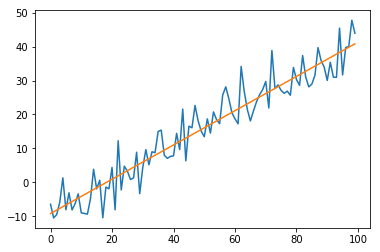

In [73]:
n = len(x)
 
m = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x**2) - (sum(x))**2)
b = (sum(y) - m * sum(x))/n
r = (n * sum(x * y) - sum(x) * sum(y)) / np.sqrt((n*sum(x**2) - sum(x)**2)
* (n * sum(y**2) - sum(y)**2))
 
print m, b, r

y2 = m*x + b
plt.plot(x,y)
plt.plot(x,y2);

This gives us pretty much the right result, but it was kind of a pain to type in. If only the libraries had some sort of function that could do linear regression for us...

In [77]:
from scipy import stats
 
r_slope, r_int, r_rval, r_pval, r_stderr = stats.linregress(x, y)
 
print "Regression Slope: ", r_slope
print "Regression Intercept: ", r_int
print "Regression correlation: ", r_rval
print "R^2:, ", r_rval**2
print "p(slope is 0): ", r_pval

Regression Slope:  0.505348919553
Regression Intercept:  -9.21261718063
Regression correlation:  0.953969863155
R^2:,  0.910058499807
p(slope is 0):  4.66984580408e-53


Or, if you want to just compute the correlation, there's a function for that

In [80]:
from scipy.stats import pearsonr, spearmanr

result = pearsonr(x, y)
print "Pearson: ", result

print

result = spearmanr(x, y)
print "Spearman: ", result

Pearson:  (0.95396986315454735, 4.6698458040795495e-53)

Spearman:  SpearmanrResult(correlation=0.95786378637863778, pvalue=6.7450753596269949e-55)


Scipy can also be used to calculate a t-test

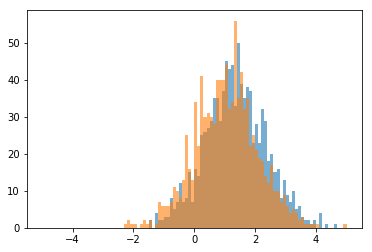

P = 3.49076882386e-11


In [82]:
from scipy.stats import ttest_ind

# Generate two sets of samples from the normal distribution

group1 = np.random.normal(1.3, 1, 1000)
group2 = np.random.normal(1, 1, 1000)

# Some plotting code (ignore for now)
plt.hist(group1, 100, (-5, 5), alpha=.6)
plt.hist(group2, 100, (-5, 5), alpha=.6)
plt.show()


result = ttest_ind(group1, group2)
print "P =", result.pvalue



## End of Part 1 - Break for Exercises

<ol>
<li style="margin-bottom: 20px"><b>Writing Mathematical Functions</b>
    <ol>
    <li>Write a function that accepts an array of floats as inputs. Return an array where every value of the input array has been divided by 1.5.</li>
    <li>Use a random function (uniform or normal) to generate an array of floats. Write a function that accepts this array, and returns a list of values that are more than one standard deviation greater or less than the mean of the array.</li>
    <li>Write a function that estimates a p-value from the exponential distribution (another distribution in numpy).  The function should take a number as an input (lets call it x), and return an estimate at the probability that a number drawn from the exponential distribution will be equal to or greater than x.  <br/><br/>To do this, generate many samples from the exponential distribution (use the default scale=1.0), count the number of samples greater than x, and divide the result by the number of samples you generated.  <br/><br/>Don't use a loop to count the number of samples greater than x.  Instead look at what happens when you use np.sum() on a boolean array, or read about the method np.count_nonzero().<br/><br/>Calling your function should look like this:<br/>
    ```
    out = my_function(3)
print out #prints 0.050316 (or close to this number)
    ```</li>
    </ol>
</li>

<li><b>Strings to arrays</b><br/>
So we had this idea that we might be able to find a periodicity in the spacing of pyrimidine residues downstream of the termination site in Rho dependent genes (by and large, we don't). Nevertheless:
    <ol>
    <li>Make a function that takes a DNA string as input (Only G, C, A, or T's) and an arbitrary substring (e.g. "CT"). The function should find all locations of the substring in the string and return it as an array.<br/><i>For Example:</i><br/>
    ```
    a = find_substring("GCACTTGCACGTACGCCGT", "AC") 
# output a contains [2, 8, 12] (or a numpy array with these values)
    ```</li>
    <li>Using the result of find_substring from (a), find the distance between each pair of adjacent substrings. (i.e. How many basepairs separate each position where we found the subtring.) Check if a numpy method does this.<br/><i>For Example:</i><br/>
    ```
    differences = find_differences(a)
# differences contains [6, 4]
    ```</li>
    <li>Use the fasta-parser you've written to read the S.cerevisiae genome fasta file from Lecture 1.1 . Then, using the functions in part (a) and (b), generate a full list of the spacings between 'CT' nucleotide pairs for each chromosome and return an array of the differences between adjacent positions</li>
<li>Using numpy, compute the histogram of these spacings (we'll show you how to plot them later).  Use Google (or the documentation we linked above) to look up the right numpy function and how to use it.</li></ol></li></ol>